In [160]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [161]:
data1 = pd.read_csv('fear_greed_index.csv')
data2 = pd.read_csv('historical_data.csv')

In [162]:
data1.shape

(2644, 4)

In [163]:
data2.shape

(211224, 16)

In [164]:
data1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [165]:
data2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [166]:
data1.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [167]:
data2.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [168]:
data1.info()

<class 'pandas.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   timestamp       2644 non-null   int64
 1   value           2644 non-null   int64
 2   classification  2644 non-null   str  
 3   date            2644 non-null   str  
dtypes: int64(2), str(2)
memory usage: 82.8 KB


In [169]:
data2.info()

<class 'pandas.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  str    
 1   Coin              211224 non-null  str    
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  str    
 6   Timestamp IST     211224 non-null  str    
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  str    
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  str    
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(8), int64(1

In [170]:
data1.duplicated().sum()

np.int64(0)

In [171]:
data2.duplicated().sum()

np.int64(0)

In [172]:
data1 = data1.drop_duplicates()
data2 = data2.drop_duplicates()

In [173]:
data2['Timestamp IST'] = pd.to_datetime(data2['Timestamp IST'],errors='coerce',format='mixed')
data2['Date'] = data2['Timestamp IST'].dt.date
data2['Date'] = pd.to_datetime(data2['Date'])
data1['date'] = pd.to_datetime(data1['date'])

In [174]:
merged_data = pd.merge(data1, data2, left_on='date', right_on='Date', how='left')
merged_data.shape


(170052, 21)

In [175]:
merged_data.head()

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,...,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,1517463000,30,Fear,2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1517549400,15,Extreme Fear,2018-02-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1517635800,40,Fear,2018-02-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1517722200,24,Extreme Fear,2018-02-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1517808600,11,Extreme Fear,2018-02-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [176]:
daily_pnl = merged_data.groupby(['Account','Date'])['Closed PnL'].sum().reset_index()

daily_pnl.head()


,Account,Date,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-06-12,-175611.000056
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.000000


In [177]:
merged_data['win'] = merged_data['Closed PnL'] > 0

winrate = merged_data.groupby('Account')['win'].mean()

winrate.head()


Account
0x083384f897ee0f19899168e3b1bec365f52a9012    0.332405
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    0.428508
0x271b280974205ca63b716753467d5a371de622ab    0.247288
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    0.439533
0x2c229d22b100a7beb69122eed721cee9b24011dd    0.515987
Name: win, dtype: float64

In [178]:
avg_size = merged_data.groupby('Account')['Size USD'].mean()

avg_size.head()


Account
0x083384f897ee0f19899168e3b1bec365f52a9012    15939.074104
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd     1624.620497
0x271b280974205ca63b716753467d5a371de622ab     8066.861549
0x28736f43f1e871e6aa8b1148d38d4994275d72c4      497.689842
0x2c229d22b100a7beb69122eed721cee9b24011dd     3285.201231
Name: Size USD, dtype: float64

In [188]:
print(merged_data.columns)


Index(['timestamp', 'value', 'classification', 'date', 'Account', 'Coin',
       'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST',
       'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash',
       'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'Date', 'win'],
      dtype='str')


In [187]:
merged_data['Leverage'].hist()

plt.title("Leverage Distribution")
plt.xlabel("Leverage")
plt.ylabel("Frequency")

plt.show()


KeyError: 'Leverage'

In [179]:
trades_per_day = merged_data.groupby('Date').size()

trades_per_day.head()


Date
2023-01-05     3
2023-05-12     9
2023-12-14    11
2023-12-15     2
2023-12-16     3
dtype: int64

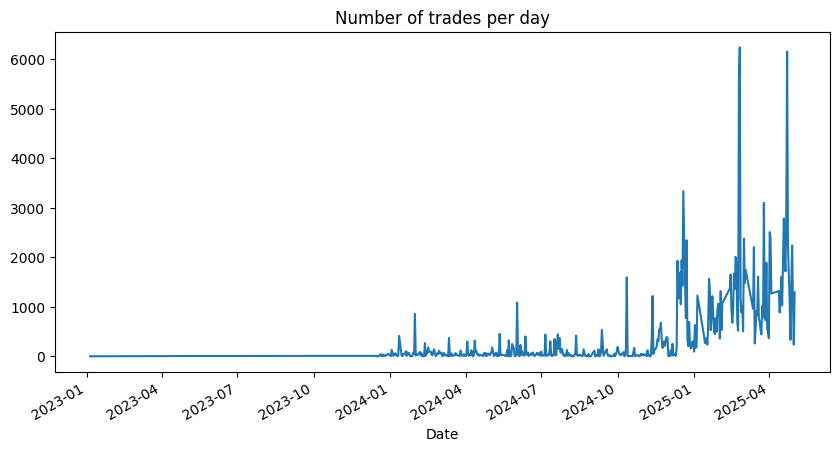

In [180]:
plt.figure(figsize=(10,5))
trades_per_day.plot()
plt.title("Number of trades per day")
plt.show()


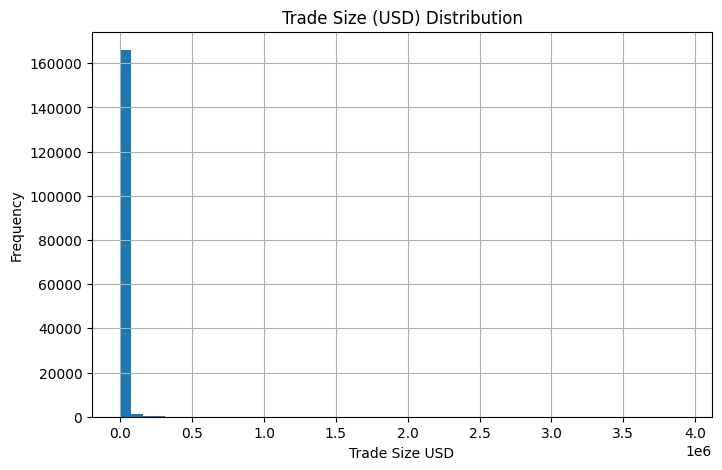

In [181]:
plt.figure(figsize=(8,5))
merged_data['Size USD'].hist(bins=50)
plt.title("Trade Size (USD) Distribution")
plt.xlabel("Trade Size USD")
plt.ylabel("Frequency")
plt.show()


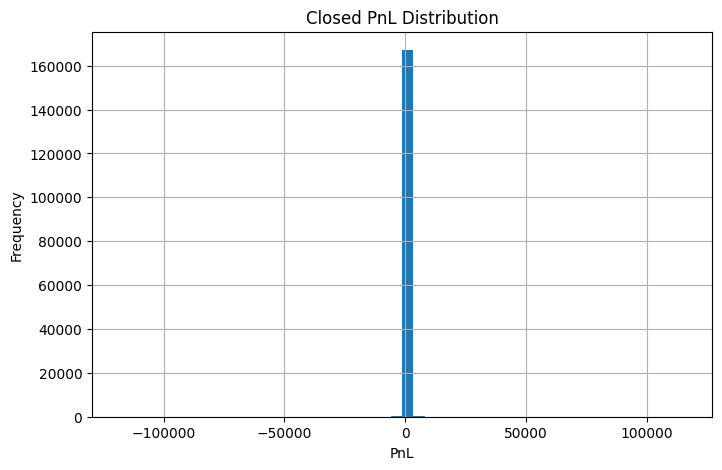

In [182]:
plt.figure(figsize=(8,5))
merged_data['Closed PnL'].hist(bins=50)
plt.title("Closed PnL Distribution")
plt.xlabel("PnL")
plt.ylabel("Frequency")
plt.show()


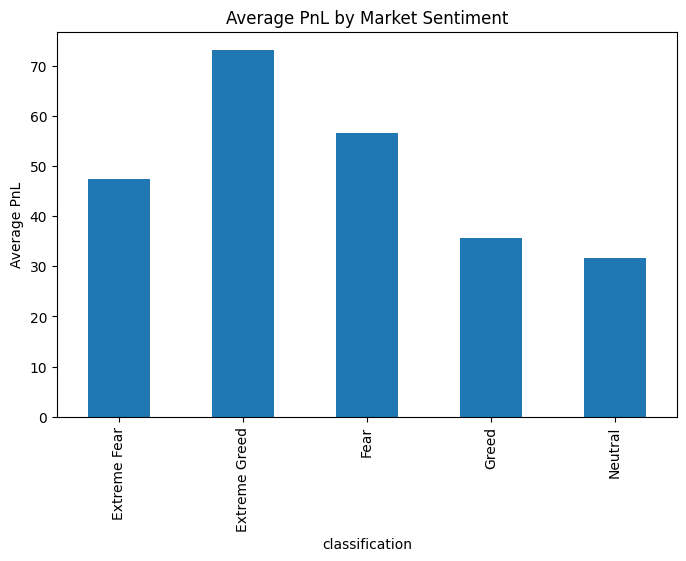

In [183]:
pnl_sentiment = merged_data.groupby('classification')['Closed PnL'].mean()

pnl_sentiment.plot(kind='bar', figsize=(8,5))
plt.title("Average PnL by Market Sentiment")
plt.ylabel("Average PnL")
plt.show()


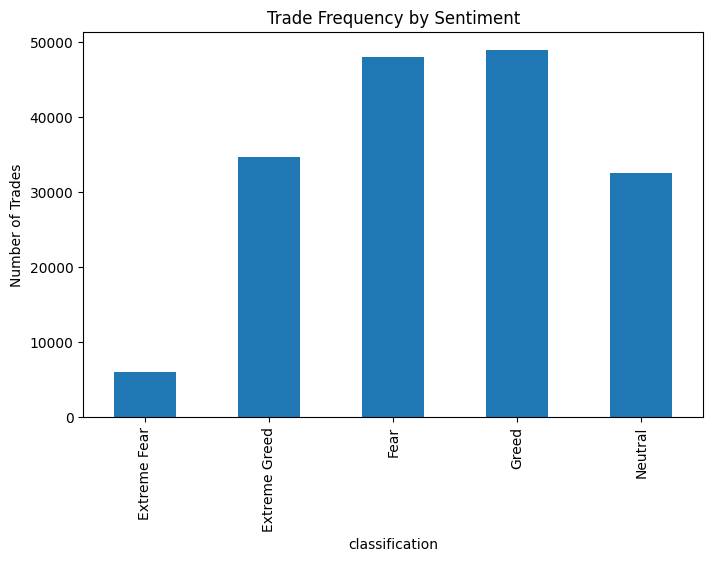

In [184]:
trade_freq = merged_data.groupby('classification').size()

trade_freq.plot(kind='bar', figsize=(8,5))
plt.title("Trade Frequency by Sentiment")
plt.ylabel("Number of Trades")
plt.show()


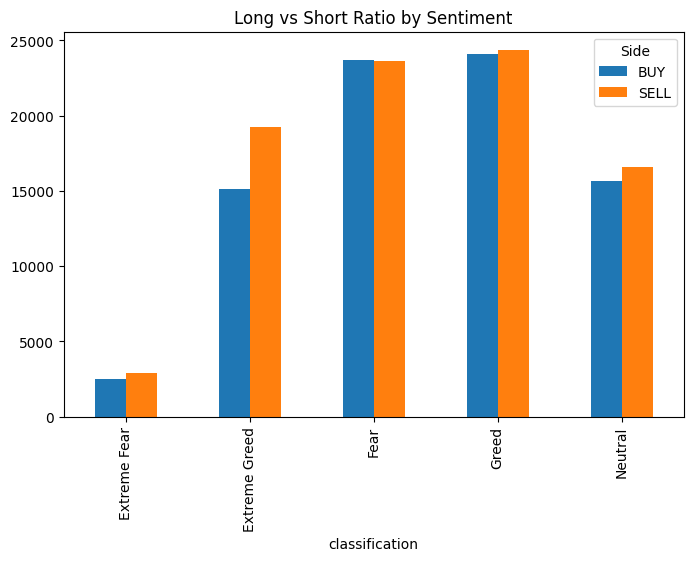

In [185]:
long_short = merged_data.groupby(['classification','Side']).size().unstack()

long_short.plot(kind='bar', figsize=(8,5))
plt.title("Long vs Short Ratio by Sentiment")
plt.show()
